<a href="https://colab.research.google.com/github/23f1002129/mini-project-2025/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1181s 9s/step - accuracy: 0.7325 - loss: 0.5825 - val_accuracy: 0.7066 - val_loss: 0.5510
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 128s 646ms/step - accuracy: 0.8067 - loss: 0.4135 - val_accuracy: 0.8150 - val_loss: 0.4268
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 85s 648ms/step - accuracy: 0.8468 - loss: 0.3419 - val_accuracy: 0.8408 - val_loss: 0.3323
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 142s 649ms/step - accuracy: 0.8757 - loss: 0.2929 - val_accuracy: 0.8619 - val_loss: 0.2785
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 84s 640ms/step - accuracy: 0.8925 - loss: 0.2322 - val_accuracy: 0.8926 - val_loss: 0.2498
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 144s 658ms/step - accuracy: 0.8910 - loss: 0.2500 - val_accuracy: 0.8849 - val_loss: 0.2759
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 84s 637ms/step - accuracy: 0.8951 - loss: 0.2376 - val_accuracy: 0.8984 - val_loss: 0.2337
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 83s 633ms/step - accuracy: 0.9118 - loss:

Validation Accuracy: 93.10%


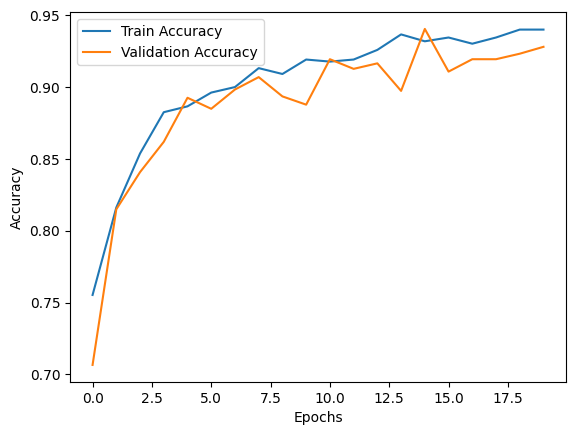

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths
train_dir = "/content/drive/MyDrive/chest x rays/chest_xray/train"
val_dir = "/content/drive/MyDrive/chest x rays/chest_xray/val"  # If you have a separate validation set

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Splitting training data (80% train, 20% validation)
)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

# Evaluate model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Save model
model.save("pneumonia_cnn_model.h5")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


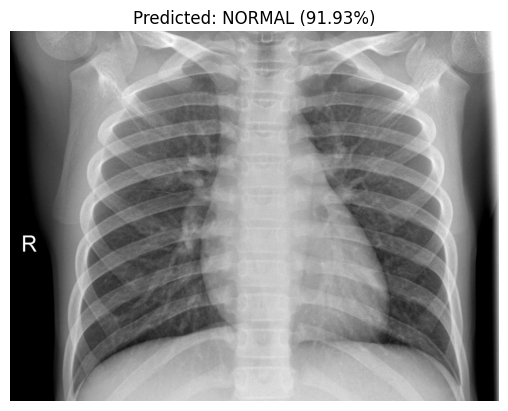

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Load trained model
model = tf.keras.models.load_model("pneumonia_cnn_model.h5")

# Define test directory
test_dir = "/content/drive/MyDrive/chest x rays/chest_xray/test"

# Get class labels (same as during training)
class_labels = ["NORMAL", "PNEUMONIA"]

# Function to preprocess and predict a single image
def predict_xray(image_path):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))  # Resize to match model input shape
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img)[0][0]

    # Determine class
    predicted_class = "PNEUMONIA" if prediction > 0.5 else "NORMAL"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Display image and prediction
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()

# Get a random test image from the test directory
test_category = np.random.choice(["NORMAL", "PNEUMONIA"])
test_images = os.listdir(os.path.join(test_dir, test_category))
random_image = os.path.join(test_dir, test_category, np.random.choice(test_images))

# Predict the test image
predict_xray(random_image)


data preprocessing